In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import particlesim.api
import particlesim.helpers_for_tests
from mpl_toolkits.mplot3d import Axes3D

In [84]:
def create_system_conf_with_na_and_cl(num_na, num_cl, box_size = 6):
    particles = particlesim.helpers_for_tests.create_positions(box_size=box_size,number_of_particles=num_na+num_cl)
    na = {'sigma':1.21496,'epsilon':0.0469,'charge':1}
    cl = {'sigma':2.02234, 'epsilon':0.15,'charge':-1.0}
    return particlesim.api.SystemConfiguration(xyz=particles, 
                                                      sigmas=([na['sigma']]*num_na)+([cl['sigma']]*num_cl),
                                                      epsilons=[na['epsilon']]*num_na+[cl['epsilon']]*num_cl,
                                                      charges=[na['charge']]*num_na+[cl['charge']]*num_cl,
                                                      box_size=6)


In [80]:
def periodic_distance(part1,part2,box_size):
    return np.linalg.norm(0.5 * box_size- (part1 - part2 + 0.5 * box_size) % box_size)

In [89]:
num_na_glob=20
num_cl_glob=20
box_size_glob = 6
system_conf = create_system_conf_with_na_and_cl(num_na=num_na_glob,num_cl=num_cl_glob, box_size = box_size_glob)
sampler = particlesim.api.Sampler(system_configuration=system_conf)

In [90]:
%%time
traj1,potential = sampler.metropolis(iteration_number=1000,beta=100)

CPU times: user 2min 48s, sys: 99.7 ms, total: 2min 48s
Wall time: 2min 48s


<IPython.core.display.Javascript object>


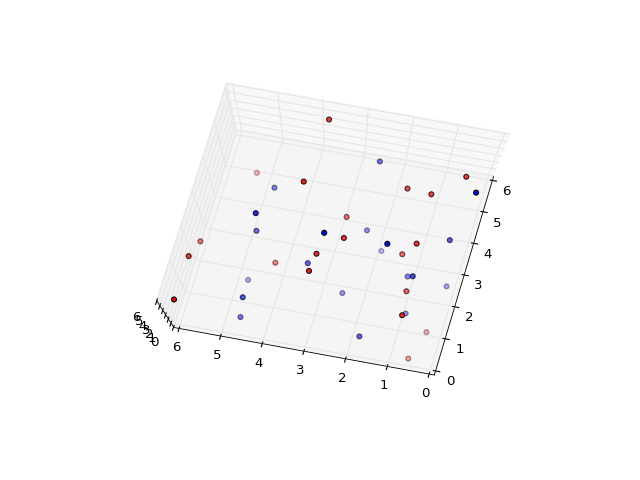

(0, 6)

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rang_of_samples = -1

ax.scatter(traj1[rang_of_samples:,:num_na_glob,0], traj1[rang_of_samples:,:num_na_glob,1], traj1[rang_of_samples:,:num_na_glob,2],c='r')

ax.scatter(traj1[rang_of_samples:,num_na_glob:,0], traj1[rang_of_samples:,num_na_glob:,1], traj1[rang_of_samples:,num_na_glob:,2],c='b')

ax.set_xlim([0,box_size_glob])
ax.set_ylim([0,box_size_glob])
ax.set_zlim([0,box_size_glob])

In [96]:
periodic_distance(traj1[-1,0,:],traj1[-1,1,:],box_size_glob)

4.0291315117541409

In [93]:
a= np.array([1,2,3])


In [103]:
%%time
system_conf._total_potential.longrange_energy(positions=system_conf.xyz)

CPU times: user 60.5 ms, sys: 16.1 ms, total: 76.7 ms
Wall time: 62.1 ms


-8.457347108012975

In [111]:
%%time
system_conf._total_potential.shortrange_energy(positions=system_conf.xyz)

CPU times: user 153 ms, sys: 4.02 ms, total: 157 ms
Wall time: 154 ms


204723146728.44708

In [113]:
system_conf.xyz[0]

array([ 3.9392925 ,  0.18022824,  1.11593784])

In [142]:
num_part = 1000
num_na_glob=num_part//2
num_cl_glob=num_part//2
box_size_glob = 6
system_conf_test = create_system_conf_with_na_and_cl(num_na=num_na_glob,num_cl=num_cl_glob, box_size = box_size_glob)

In [143]:
%%time
for i in range(num_part):
    system_conf_test._total_potential.shortrange.nlist.get_particles_within_radius(i)

CPU times: user 47 s, sys: 58.7 ms, total: 47 s
Wall time: 47 s


In [145]:
%%time
system_conf_test._total_potential.shortrange_energy(positions=system_conf_test.xyz)

CPU times: user 1min 18s, sys: 58.3 ms, total: 1min 18s
Wall time: 1min 18s


1.4827420801687871e+19